## Fit income distribution.

In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Computer Modern Roman"]})

In [3]:
df_income = pd.read_csv('statistics_CBS/Inkomen_huishoudens__inkomensklassen_02052022_131156.csv', 
                        delimiter=';')
df_income.head()

,Inkomensbegrippen,Inkomensklassen,Kenmerken van huishoudens,Perioden,Particuliere huishoudens (x 1 000)
0,Besteedbaar inkomen,Inkomen: minder dan 10 000 euro,Particuliere huishoudens,2018,320.9
1,Besteedbaar inkomen,Inkomen: 10 000 tot 20 000 euro,Particuliere huishoudens,2018,1184.2
2,Besteedbaar inkomen,Inkomen: 20 000 tot 30 000 euro,Particuliere huishoudens,2018,1673.7
3,Besteedbaar inkomen,Inkomen: 30 000 tot 40 000 euro,Particuliere huishoudens,2018,1265.9
4,Besteedbaar inkomen,Inkomen: 40 000 tot 50 000 euro,Particuliere huishoudens,2018,1006.1


In [4]:
income_range_l = np.arange(0, 50000, 10000)
income_range_l = np.append(income_range_l, [50000, 100000, 200001])
income_range_u = np.arange(10000, 60000, 10000)
income_range_u = np.append(income_range_u, [100000, 200000, 300000])

In [5]:
incomes = df_income['Particuliere huishoudens (x 1 000)'].to_numpy()
incomes_norm = incomes / (income_range_u - income_range_l)


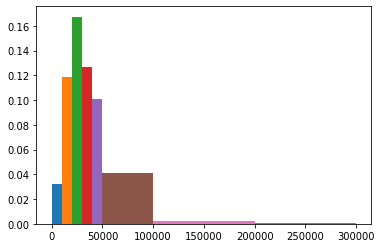

In [6]:
for i,(u,l) in enumerate(zip(income_range_l, income_range_u)):
    plt.bar(x=(u+l)/2, height=incomes_norm[i], width=l-u)

plt.show()

In [7]:
income_range_l_full = np.arange(0, 300000, 10000)
income_range_u_full = np.arange(10000, 310000, 10000)

In [8]:
incomes_norm_full = np.insert(incomes_norm, 5, [incomes_norm[5] for _ in range(4)])
incomes_norm_full = np.insert(incomes_norm_full, 10, [incomes_norm[6] for _ in range(9)])
incomes_norm_full = np.insert(incomes_norm_full, 21, [incomes_norm[7] for _ in range(9)])

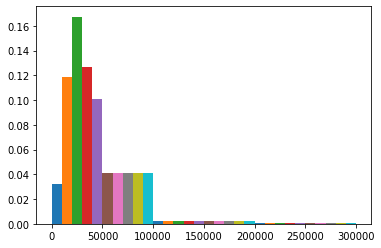

In [9]:
for i,(u,l) in enumerate(zip(income_range_l_full, income_range_u_full)):
    plt.bar(x=(u+l)/2, height=incomes_norm_full[i], width=l-u)
plt.show()

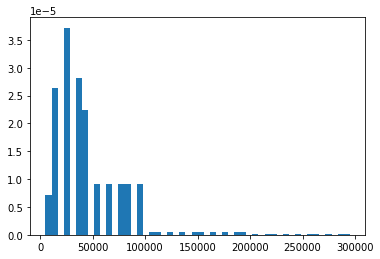

In [10]:
n_in_sample = 1e5

sample = []

for frac, l, u in zip(incomes_norm_full, income_range_l_full, income_range_u_full):
    for _ in range(int(n_in_sample * frac)):
        sample.append((l + u) / 2)

plt.hist(sample, bins=50, density=True)
plt.show()

In [11]:
# Fit the lognormal distribution
sigma, loc, scale = stats.lognorm.fit(sample, floc=0)

In [12]:
print(f"sigma: {sigma}, loc: {loc}, scale: {scale}")

sigma: 0.730962067882722, loc: 0.0, scale: 34922.801992160676


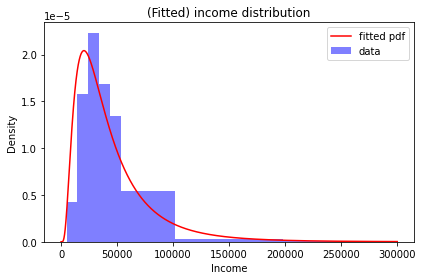

In [13]:
x = np.linspace(0, 300000, int(1e4))
dist = stats.lognorm(s=sigma, loc=loc, scale=scale)

plt.plot(x, dist.pdf(x), color='red', label='fitted pdf')
plt.hist(sample, bins=30, density=True, color='blue', alpha=.5, label='data')
plt.xlabel('Income')
plt.ylabel('Density')
plt.title('(Fitted) income distribution')
plt.legend()
plt.tight_layout()
plt.show()

### Skill distribution now follows the fitted income distribution

In [14]:
hh_incomes = np.array([])
while len(hh_incomes) < 2500:
    s = dist.rvs()
    if s < 2e5:
        # hh_incomes.append(s)
        hh_incomes = np.append(hh_incomes, s)

In [15]:
hh_skills = 2500 * hh_incomes / sum(hh_incomes)

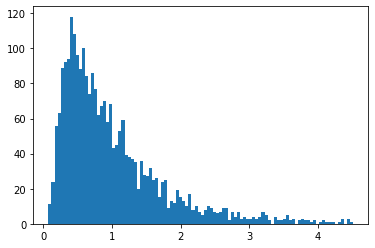

In [16]:
plt.hist(hh_skills, bins=100)
plt.show()

In [17]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

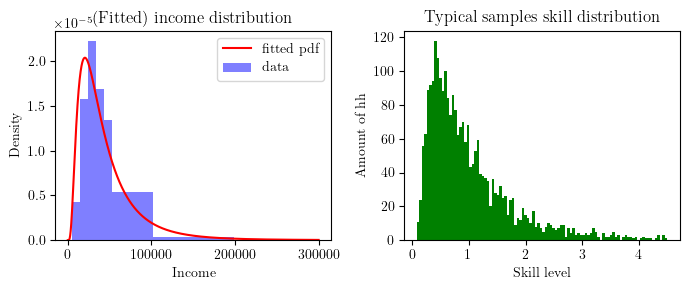

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

x = np.linspace(0, 300000, int(1e4))
dist = stats.lognorm(s=sigma, loc=loc, scale=scale)

ax[0].plot(x, dist.pdf(x), color='red', label=r'fitted pdf')
ax[0].hist(sample, bins=30, density=True, color='blue', alpha=.5, label='data')
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Density')
ax[0].set_title('(Fitted) income distribution')
ax[0].legend()

ax[1].hist(hh_skills, bins=100, color='green')
ax[1].set_title('Typical samples skill distribution')
ax[1].set_xlabel('Skill level')
ax[1].set_ylabel('Amount of hh')

plt.tight_layout()
plt.show()

## Wealth Distribution

In [23]:
df_wealth = pd.read_csv('statistics_CBS/Vermogen_huishoudens__vermogensklassen_02052022_222329.csv', 
                        delimiter=';')
df_wealth.head()
# print(df_wealth['Vermogensklassen'])

,Kenmerken van huishoudens,Vermogensklassen,Perioden,Particuliere huishoudens (x 1 000)
0,Particuliere huishoudens,Vermogen: tot -5 000 euro,2018,949.8
1,Particuliere huishoudens,Vermogen: -5 000 tot 0 euro,2018,472.0
2,Particuliere huishoudens,Vermogen: 0 tot 1 000 euro,2018,422.1
3,Particuliere huishoudens,Vermogen 1 000 tot 5 000 euro,2018,637.9
4,Particuliere huishoudens,Vermogen: 5 000 tot 10 000 euro,2018,359.0


In [24]:
wealth_range_l = np.array([-10000, -5000, 0, 1000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000])
wealth_range_u = np.array([-5000, 0, 1000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000, 1500000])

In [25]:
wealth_norm = df_wealth['Particuliere huishoudens (x 1 000)'].to_numpy() / (wealth_range_u - wealth_range_l)

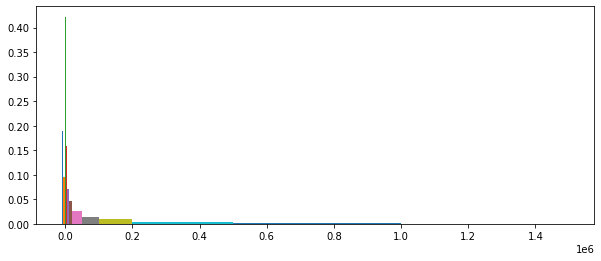

In [32]:
fig = plt.figure(figsize=(10,4))

for i,(u,l) in enumerate(zip(wealth_range_l, wealth_range_u)):
    plt.bar(x=(u+l)/2, height=wealth_norm[i], width=l-u)

# plt.xscale('log')
# plt.yscale('log')
plt.show()